<a href="https://colab.research.google.com/github/lioAbdo/Machine-Learning/blob/master/regressionLineaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**régression Linéaire**

In [0]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

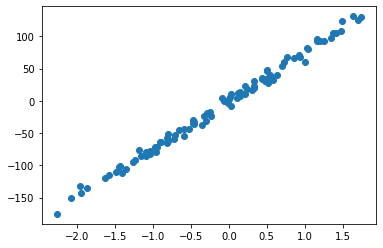

In [32]:
(x,y) = make_regression(n_samples=100, n_features=1, noise=5)
plt.scatter(x,y)

In [33]:
 #Verifier toujours les dimensions
print(x.shape)
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [34]:
#matrice X
X=np.hstack((x, np.ones(x.shape)))
X

array([[-0.47465907,  1.        ],
       [ 1.40632179,  1.        ],
       [-1.43152296,  1.        ],
       [-1.26496508,  1.        ],
       [-0.24841153,  1.        ],
       [-1.95827482,  1.        ],
       [-1.36037036,  1.        ],
       [-0.46729313,  1.        ],
       [ 0.23525811,  1.        ],
       [ 1.3429566 ,  1.        ],
       [ 0.02500477,  1.        ],
       [ 0.32678182,  1.        ],
       [-0.80169898,  1.        ],
       [-1.48798908,  1.        ],
       [-0.46322598,  1.        ],
       [-0.96584756,  1.        ],
       [ 1.00992764,  1.        ],
       [-2.07814962,  1.        ],
       [-0.65953284,  1.        ],
       [ 0.02764581,  1.        ],
       [-1.86663995,  1.        ],
       [ 0.14026904,  1.        ],
       [-0.72167276,  1.        ],
       [ 0.3013461 ,  1.        ],
       [-0.33077716,  1.        ],
       [ 0.44180125,  1.        ],
       [ 0.51473504,  1.        ],
       [-1.09686388,  1.        ],
       [ 1.74411498,

In [35]:
#initialiser theta
np.random.seed()
theta=np.random.randn(2,1)
theta
theta.shape

(2, 1)

##**Modèle**

In [0]:
# h(theta)
def model(X, theta):
  return X.dot(theta)  #c le produit matriciel, et c l'équivalent de 'ax+b'

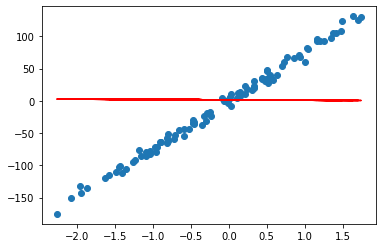

In [37]:
#afficher notre modèle
plt.scatter(x,y)
plt.plot(x, model(X,theta), c='r')

##**Cost function**

In [38]:
def cost_fct(X,y,theta):
  m=len(y)
  return 1/(2*m) * np.sum((model(X,theta)-y)**2)

cost_fct(X,y,theta)

2686.6398078455854

In [0]:
def grad(X,y,theta):
  m=len(y)
  return 1/m * X.T.dot(model(X,theta)-y) # X.T multiplié par h(theta)-y

In [0]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
  cost_history=np.zeros(n_iterations)
  for i in range(n_iterations):
    theta = theta - learning_rate * grad(X,y,theta)
    cost_history[i]=cost_fct(X,y,theta)
  return theta, cost_history

##**ML!**

In [41]:
theta_final, cost_history = gradient_descent(X,y, theta, learning_rate=0.001, n_iterations=10000)
print(theta_final)
print('-'*10 + 'here is the cost function history')
cost_history

[[74.61377287]
 [ 0.50850592]]
----------here is the cost function history


array([2681.49204401, 2676.35439699, 2671.22684653, ...,   15.78139345,
         15.78139332,   15.78139319])

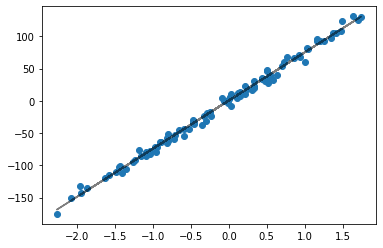

In [42]:
predictions=model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions, c='black', alpha=0.5)

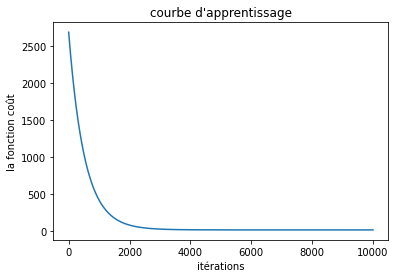

In [50]:
plt.plot(range(10000), cost_history)
plt.xlabel('itérations')
plt.ylabel('la fonction coût')
plt.title("courbe d'apprentissage")
plt.show()

**on peut constater qu'on a pu s'arrêter à l'étape 400, ça aurait économisé du temps et de l'énergie à la machine**

#**Calcul du coeffeicient R2 de détermination**
> montrer la réelle performance de notre modèle

In [49]:
def coef_determination(y, pred):    # pred : nos prédictions
  u= ((y-pred)**2).sum() #le résidu de la somme des carrés des différences (diff entre nos vraies valeurs prédites par le modèle)
  v= ((y-y.mean())**2).sum() # (variance)
  return 1- u/v
coef_determination(y, predictions)

0.9939081102300663